In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
pd.__version__

'2.2.2'

In [3]:
!pip install pyarrow

Q1. Downloading the data
We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for January and February 2023.

Read the data for January. How many columns are there?

16
17
18
19

In [4]:
data_jan = pd.read_parquet(r'C:\Users\Abhinav\Downloads\Data-Analytics\Machine-Learning\MLOps-Zoomcamp\01-intro\yellow_tripdata_2023-01.parquet')
data_feb = pd.read_parquet(r'C:\Users\Abhinav\Downloads\Data-Analytics\Machine-Learning\MLOps-Zoomcamp\01-intro\yellow_tripdata_2023-02.parquet')


In [5]:
data_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [6]:
data_jan.shape

(3066766, 19)

In [7]:
data_jan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

Q2. Computing duration
Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

32.59
42.59
52.59
62.59

In [8]:
data_jan['Duration'] = (data_jan['tpep_dropoff_datetime'] - data_jan['tpep_pickup_datetime']) / pd.Timedelta(minutes=1)

In [9]:
data_jan['Duration'].std()

42.59435124195458

Q3. Dropping outliers
Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

90%
92%
95%
98%

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_21436\2098616565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_jan['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

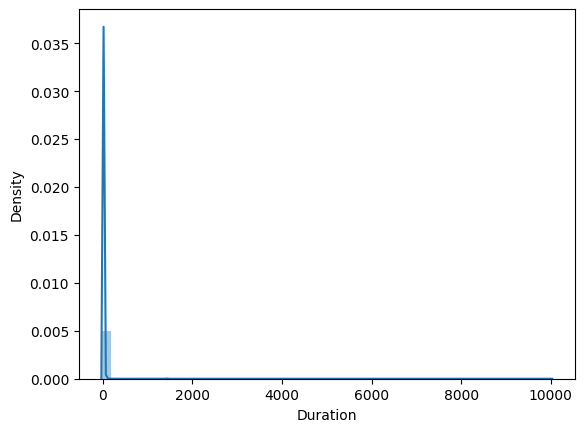

In [10]:
sns.distplot(data_jan['Duration'])

In [11]:
data_with_no_outlier = data_jan[(data_jan['Duration']>=1) & (data_jan['Duration']<=60)]
(data_with_no_outlier.shape[0]/data_jan.shape[0])*100

98.1220282212598

Q4. One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix (number of columns)?

2
155
345
515
715

In [12]:
categorical = ['PULocationID', 'DOLocationID']


In [13]:
df = data_with_no_outlier[categorical + ['Duration']]

df[categorical] = df[categorical].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3009173 entries, 0 to 3066765
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   PULocationID  object 
 1   DOLocationID  object 
 2   Duration      float64
dtypes: float64(1), object(2)
memory usage: 91.8+ MB


C:\Users\Abhinav\AppData\Local\Temp\ipykernel_21436\2401807958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [14]:
dv = DictVectorizer()
train_dicts = df[categorical].to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)

y_train = df['Duration'].values

In [15]:
X_train.shape

(3009173, 515)

In [16]:
# Identifying unique IDs 
common_pu_ids = set(data_jan['PULocationID'].unique()).intersection(set(data_feb['PULocationID'].unique()))
common_do_ids = set(data_jan['DOLocationID'].unique()).intersection(set(data_feb['DOLocationID'].unique()))

# Filtering the data_jan to keep only rows with common IDs
df_jan_filtered = data_jan[data_jan['PULocationID'].isin(common_pu_ids) & data_jan['DOLocationID'].isin(common_do_ids)]

# Filtering the data_feb to keep only rows with common IDs
df_feb_filtered = data_feb[data_feb['PULocationID'].isin(common_pu_ids) & data_feb['DOLocationID'].isin(common_do_ids)]

Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters, where duration is the response variable
Calculate the RMSE of the model on the training data
What's the RMSE on train?

3.64
7.64
11.64
16.64

In [17]:
def read_data(df, cat_cols,dv):
    #if filename.endswith('.parquet'):
        df['Duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / pd.Timedelta(minutes=1)
        
        df = df[(df.Duration >= 1) & (df.Duration <= 60)]
        
        
        print('\n', df.shape)
        
        df[cat_cols] = df[cat_cols].astype(str)
        
        
        df = df[cat_cols + ['Duration']]
       
        val_dicts = df[cat_cols].to_dict(orient='records')

        X_val = dv.fit_transform(val_dicts)

        y_val = df['Duration'].values
        
        return X_val,y_val
    
X_train,y_train = read_data(df_jan_filtered,categorical,dv)

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_21436\3308134624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / pd.Timedelta(minutes=1)



 (3009169, 20)


C:\Users\Abhinav\AppData\Local\Temp\ipykernel_21436\3308134624.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_cols] = df[cat_cols].astype(str)


In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

c:\Users\Abhinav\Downloads\Data-Analytics\Machine-Learning\MLOps-Zoomcamp\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.649266899637237

Q6. Evaluating the model
Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

3.81
7.81
11.81
16.81

In [19]:
def read_data(df, cat_cols,dv):
    #if filename.endswith('.parquet'):
        df['Duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / pd.Timedelta(minutes=1)
        
        df = df[(df.Duration >= 1) & (df.Duration <= 60)]
        
        
        print('\n', df.shape)
        
        df[cat_cols] = df[cat_cols].astype(str)
        
        
        df = df[cat_cols + ['Duration']]
        print(df.info())
        
        val_dicts = df[cat_cols].to_dict(orient='records')

        X_val = dv.transform(val_dicts)

        y_val = df['Duration'].values
        
        return X_val,y_val

In [20]:
categorical
X_val,y_val = read_data(df_feb_filtered,categorical,dv)


C:\Users\Abhinav\AppData\Local\Temp\ipykernel_21436\46401482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / pd.Timedelta(minutes=1)



 (2855947, 20)


C:\Users\Abhinav\AppData\Local\Temp\ipykernel_21436\46401482.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_cols] = df[cat_cols].astype(str)


<class 'pandas.core.frame.DataFrame'>
Index: 2855947 entries, 0 to 2913954
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   PULocationID  object 
 1   DOLocationID  object 
 2   Duration      float64
dtypes: float64(1), object(2)
memory usage: 87.2+ MB
None


In [21]:
y_pred_eval = lr.predict(X_val)

mean_squared_error(y_val, y_pred_eval, squared=False)

c:\Users\Abhinav\Downloads\Data-Analytics\Machine-Learning\MLOps-Zoomcamp\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.811803245777077